In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/b002/",
            "../checkpoints/b003/",
            "../checkpoints/b004/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
vh.get_arguments_overview(dirnames)

,b001,b002,b003,b004
ts_per_hour,1,12,1,1
rulebased_setpoint_unoccu_mean,22.0,22.0,22.0,23.0
rulebased_setpoint_unoccu_delta,7.0,7.0,7.0,1.0
rulebased_setpoint_occu_mean,22.0,22.0,22.0,24.0


In [10]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:      0
Last available evaluation episode for dfs2:      0
Last available evaluation episode for dfs3:      0


<h3>Details for one week</h3>

In [11]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [12]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [13]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Numer of setpoint changes: 426.88118883889297
For episode     0: Energy consumption:   34881.05 kWh; Numer of setpoint changes: 4028.7928732688115
For episode     0: Energy consumption:   40568.54 kWh; Numer of setpoint changes: 813.0655750020342
For episode     0: Energy consumption:   88590.40 kWh; Numer of setpoint changes: 1358.9219253550984

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
...     0: Reward: -0.06682 kWh; Setpoint change magnit.:  0.46635; Energy cons.: 4037.62618
...     0: Reward: -0.39520 kWh; Setpoint change magnit.:  1.13083; Energy cons.: 56423.55555
...     0: Reward: -0.80507 kWh; Setpoint change magnit.:  1.89002; Energy cons.: 123213.35192


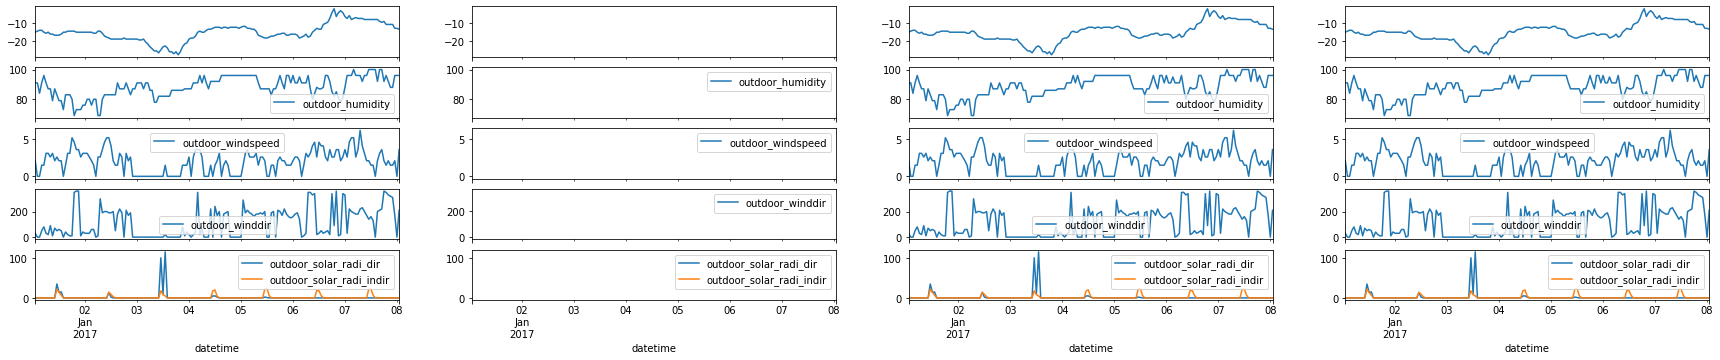

In [14]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

Text(0, 0.5, 'Outdoor temperature in °C')

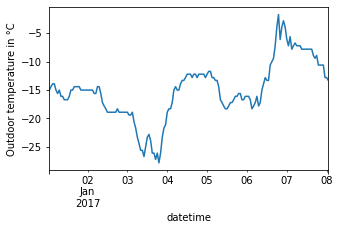

In [15]:
p = plt.figure(figsize=(5,3))
a = plt.gca()
a2= subdfs[0]['sees'].loc[:,"outdoor_temp"].plot(ax=a)
a2.set_ylabel("Outdoor temperature in "+u"\u00b0"+"C")
#p.savefig("saved_plots/baseline_outdoor_temperature.pdf")
#p.savefig("saved_plots/baseline_outdoor_temperature.png")

Text(0, 0.5, 'Outdoor humidity in %')

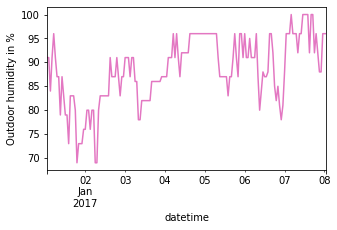

In [16]:
p = plt.figure(figsize=(5,3))
a = plt.gca()
a2= subdfs[0]['sees'].loc[:,"outdoor_humidity"].plot(ax=a, color='#e377c2')
a2.set_ylabel("Outdoor humidity in %")
#p.savefig("saved_plots/baseline_outdoor_humidity.pdf")
#p.savefig("saved_plots/baseline_outdoor_humidity.png")

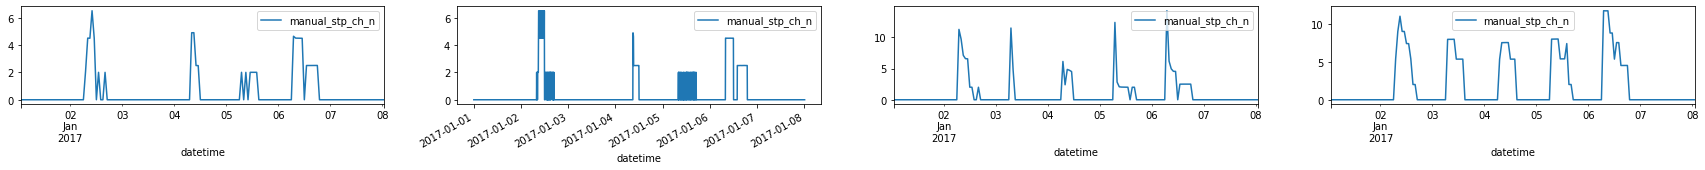

In [17]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

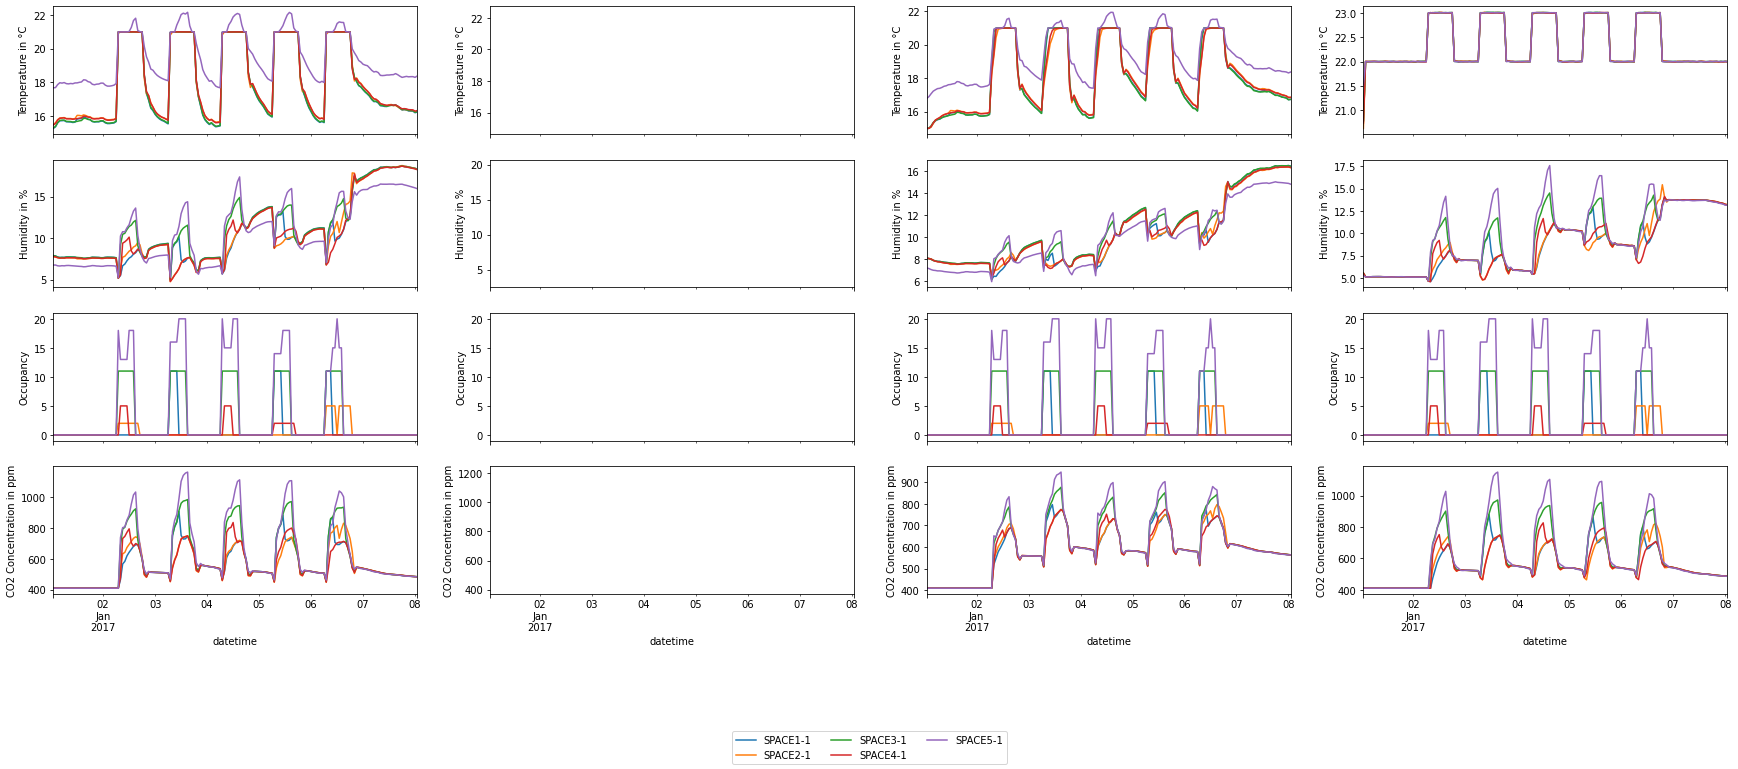

In [18]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

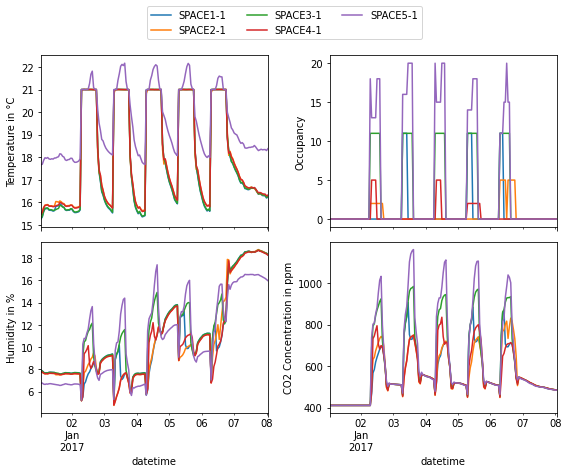

In [19]:
p, a = vh.complete_plot_room_status(subdfs[0], 8, True)
handles, labels = a[0, 0].get_legend_handles_labels()
p.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5,1.1))
p.tight_layout()
p.show()
p.savefig("saved_plots/baseline_indoor_overview.pdf", bbox_inches='tight')
p.savefig("saved_plots/baseline_indoor_overview.png", bbox_inches='tight')

In [20]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 



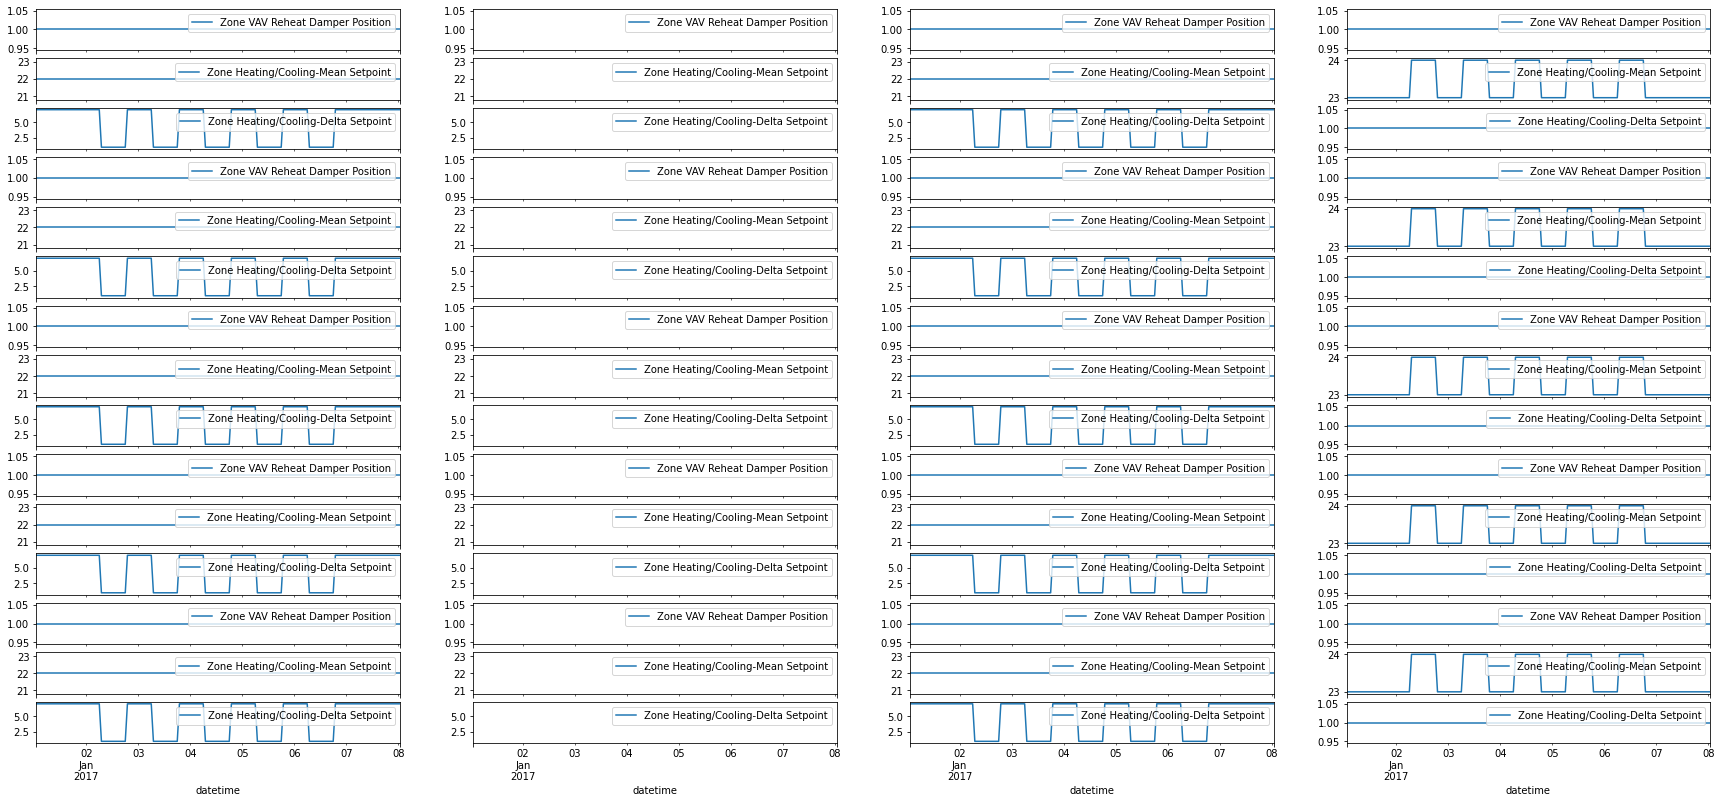

In [21]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

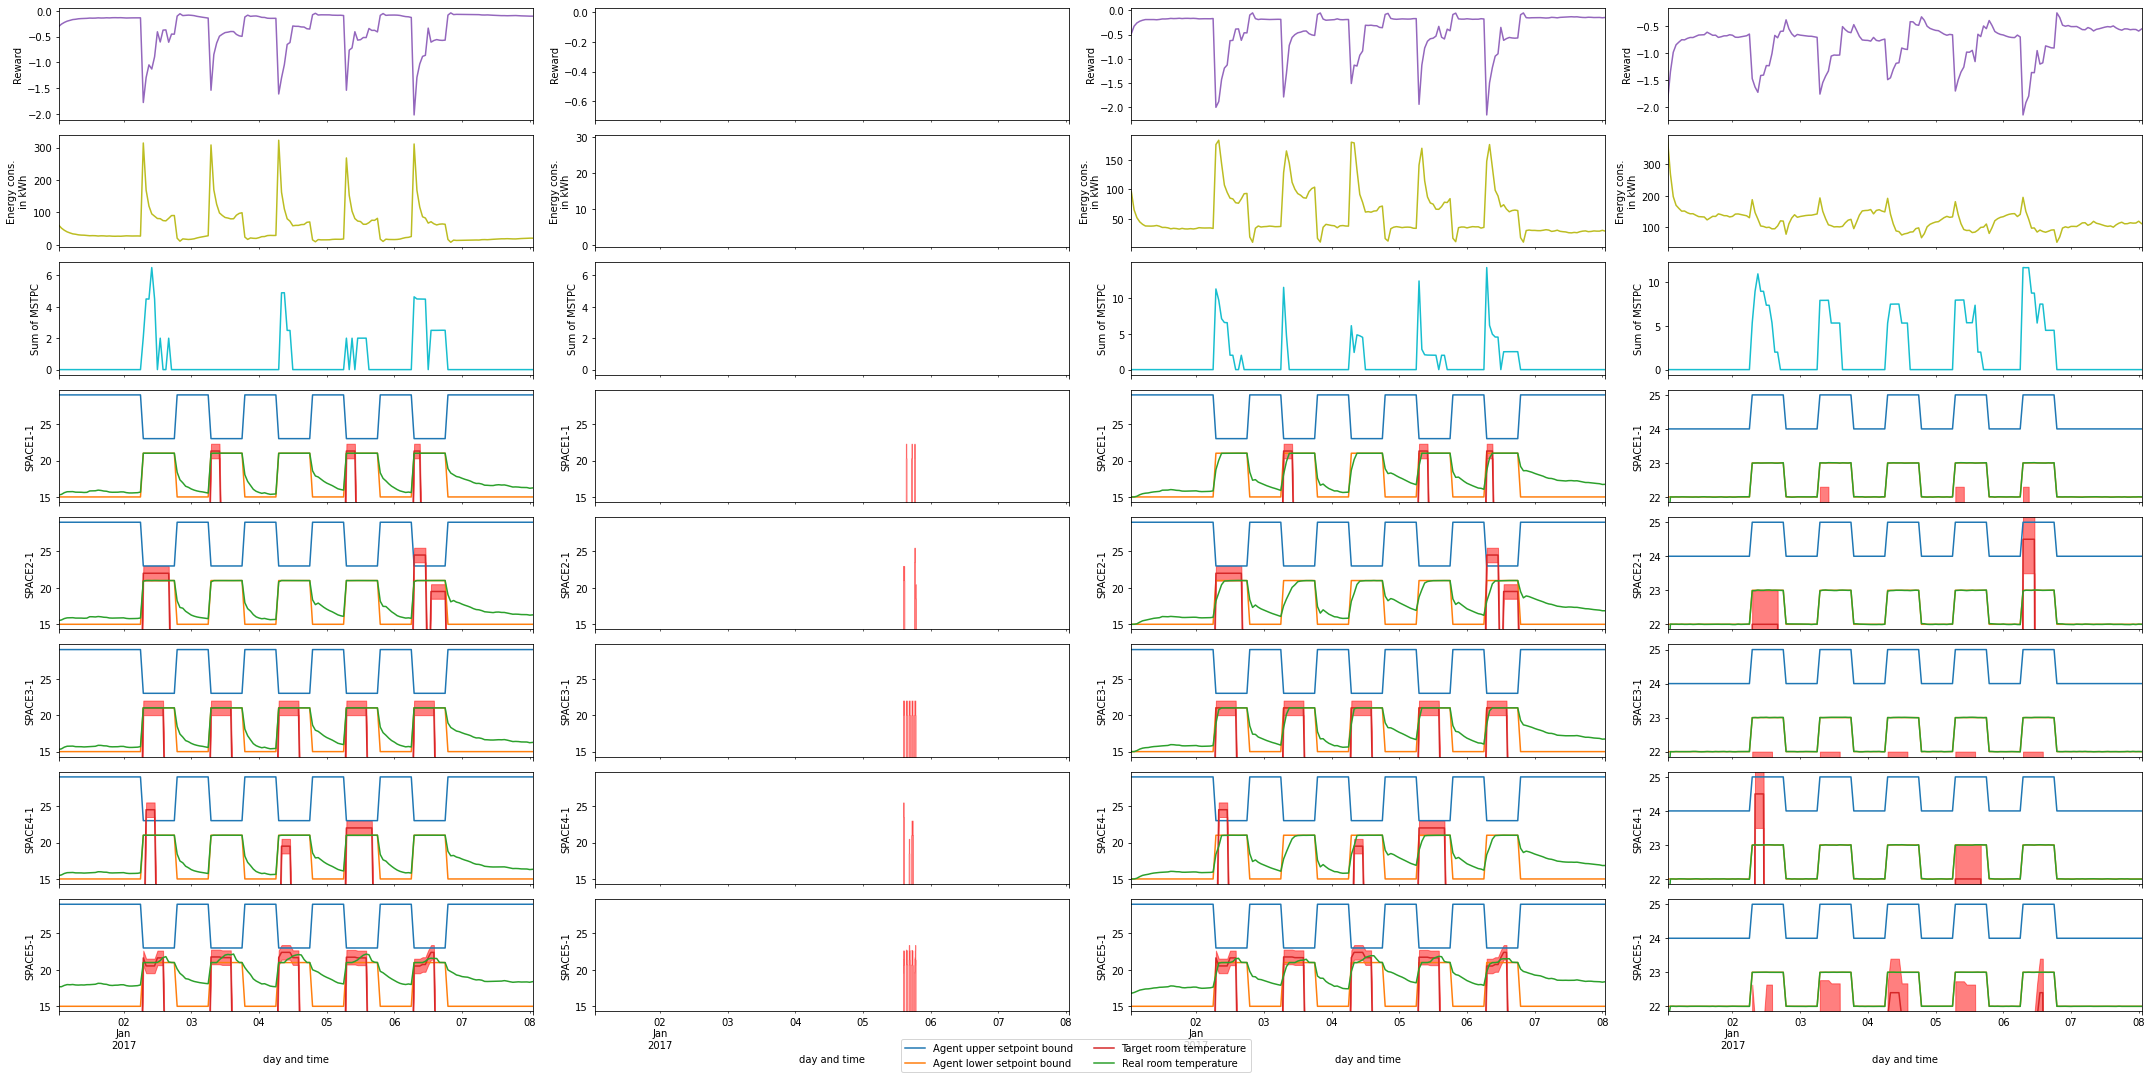

In [22]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

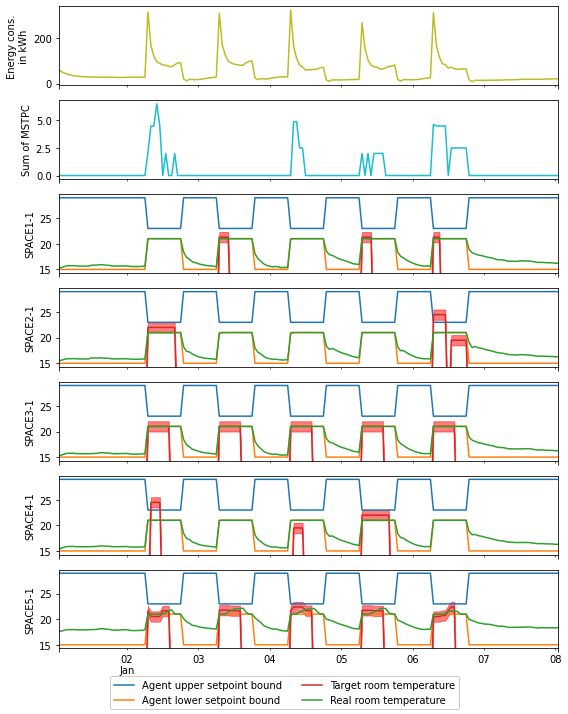

In [23]:
p, a = vh.complete_plot_total_overview(subdfs[0], 8, subdfs_rooms[0], subdfs_agents[0], framealpha=1.0, fig_height_sf=0.75)#, legend_location='upper center')
a[0,0].remove()
p.tight_layout()
#p.savefig("saved_plots/baseline_eval_week_action_details.pdf")
#p.savefig("saved_plots/baseline_eval_week_action_details.png")
p.show()

<h3>Details for a day</h3>

In [24]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [25]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

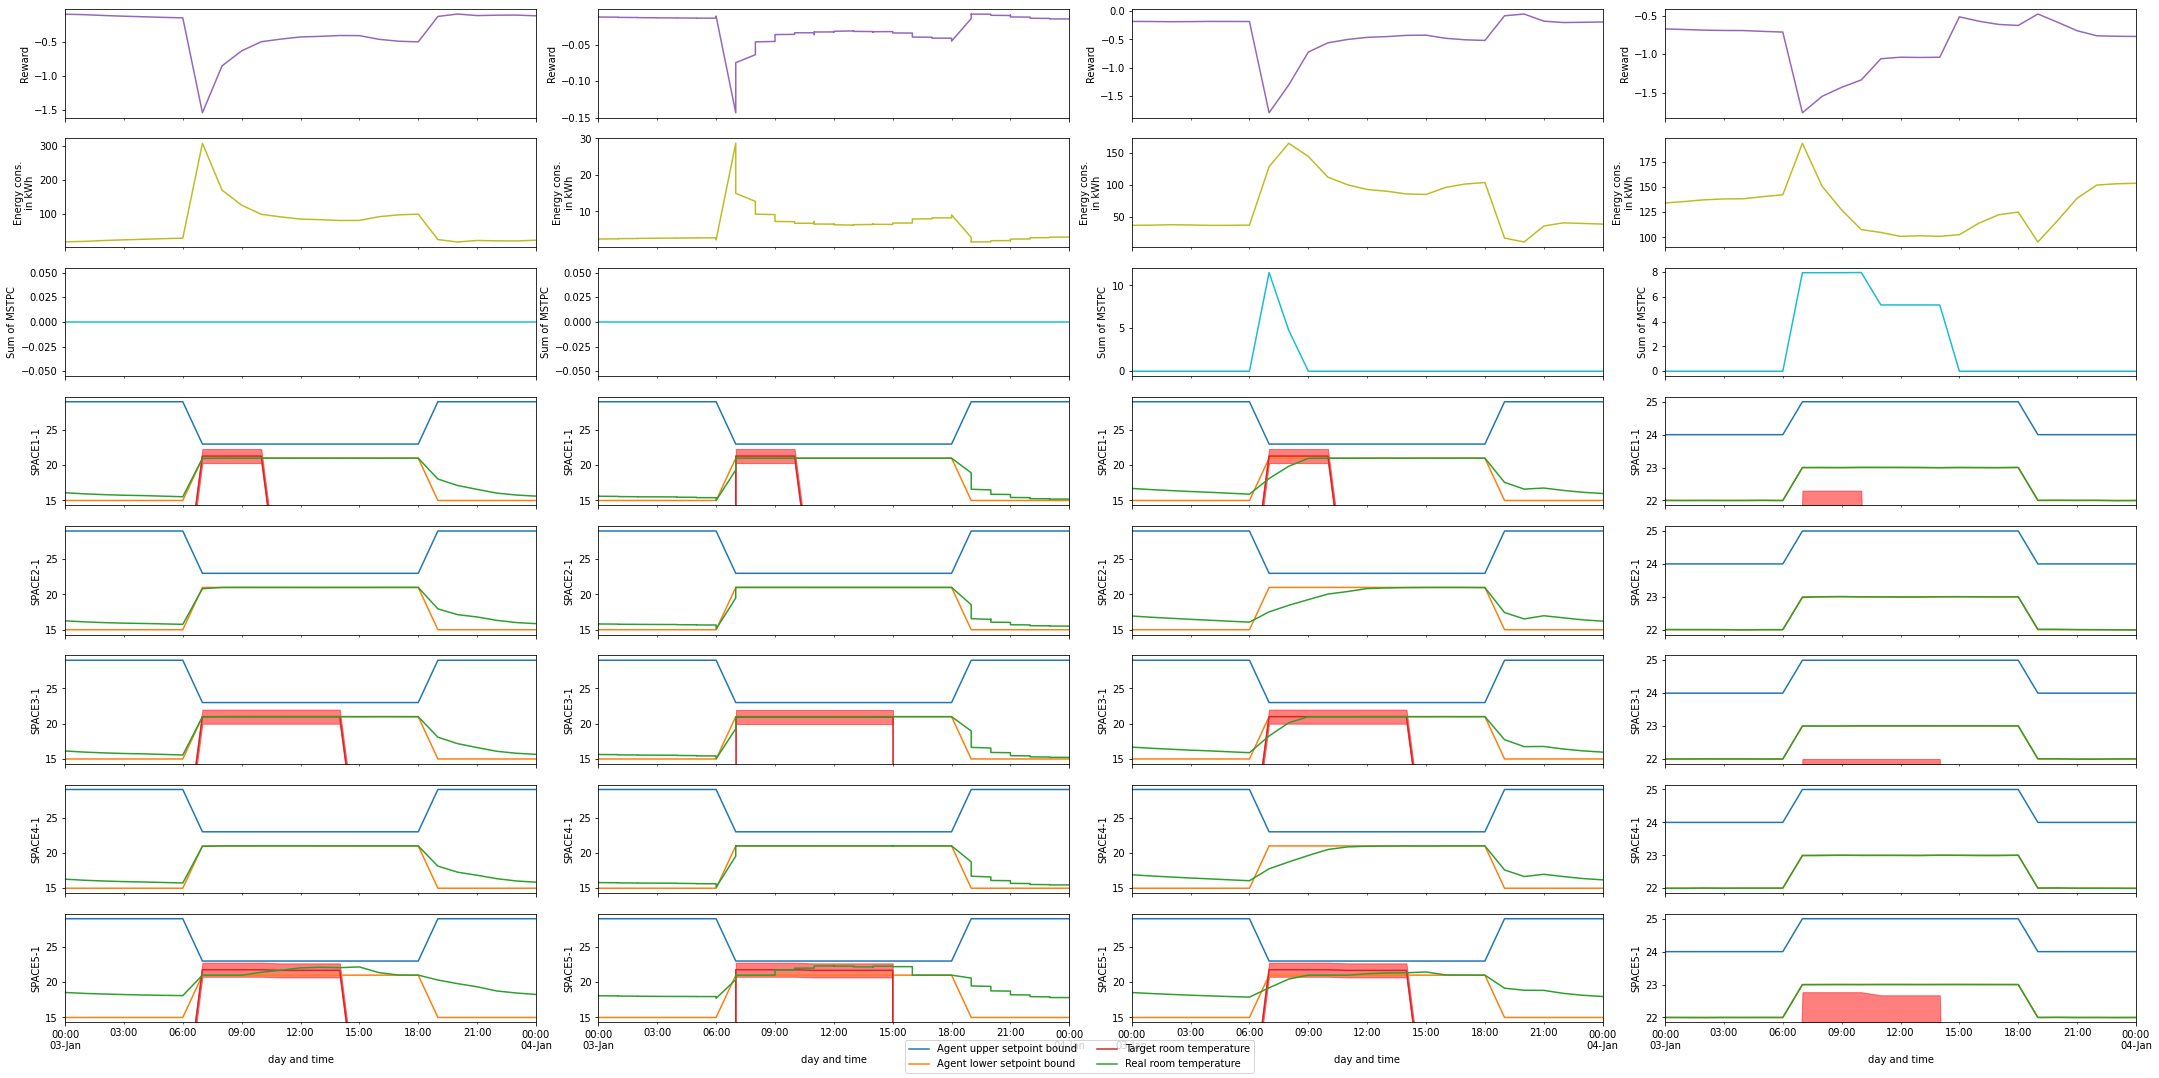

In [26]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [27]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [28]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =   3974.3 Wh, mean reward = -0.0647
For plot number 3, mean energy consumption =  55710.3 Wh, mean reward = -0.3856
For plot number 4, mean energy consumption = 122653.2 Wh, mean reward = -0.7985


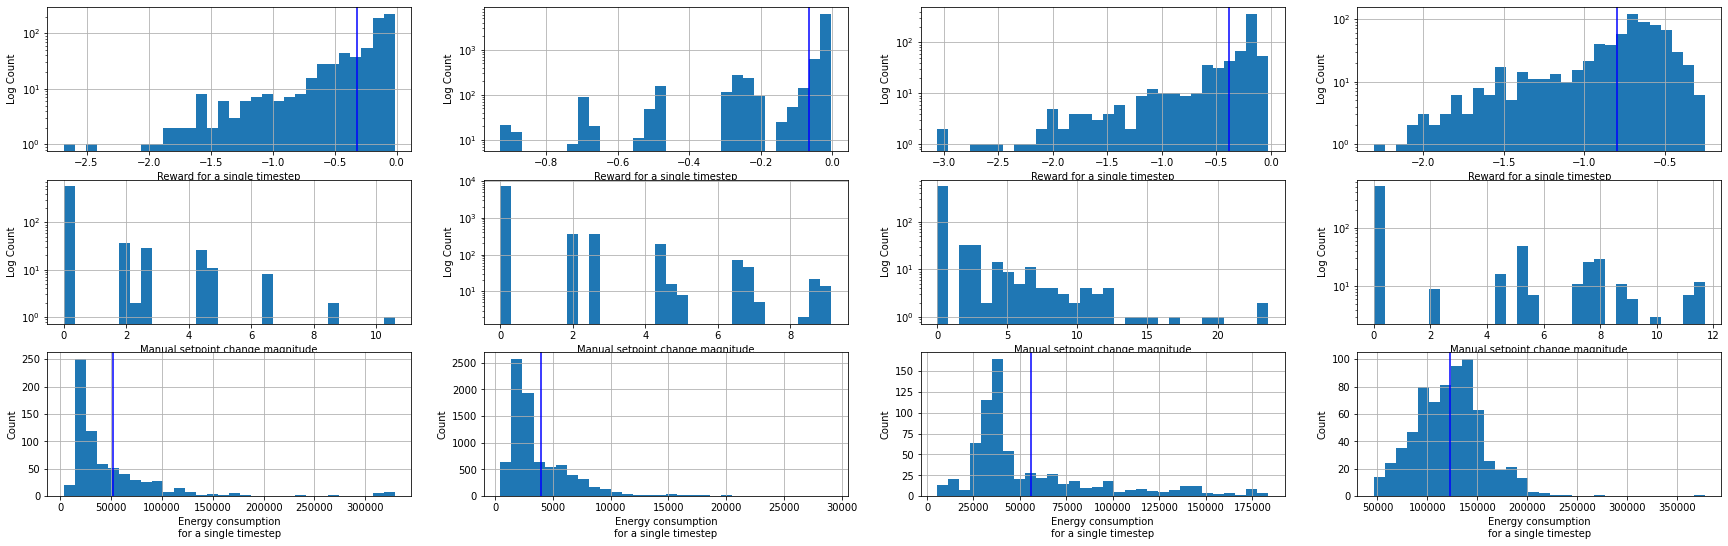

In [29]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

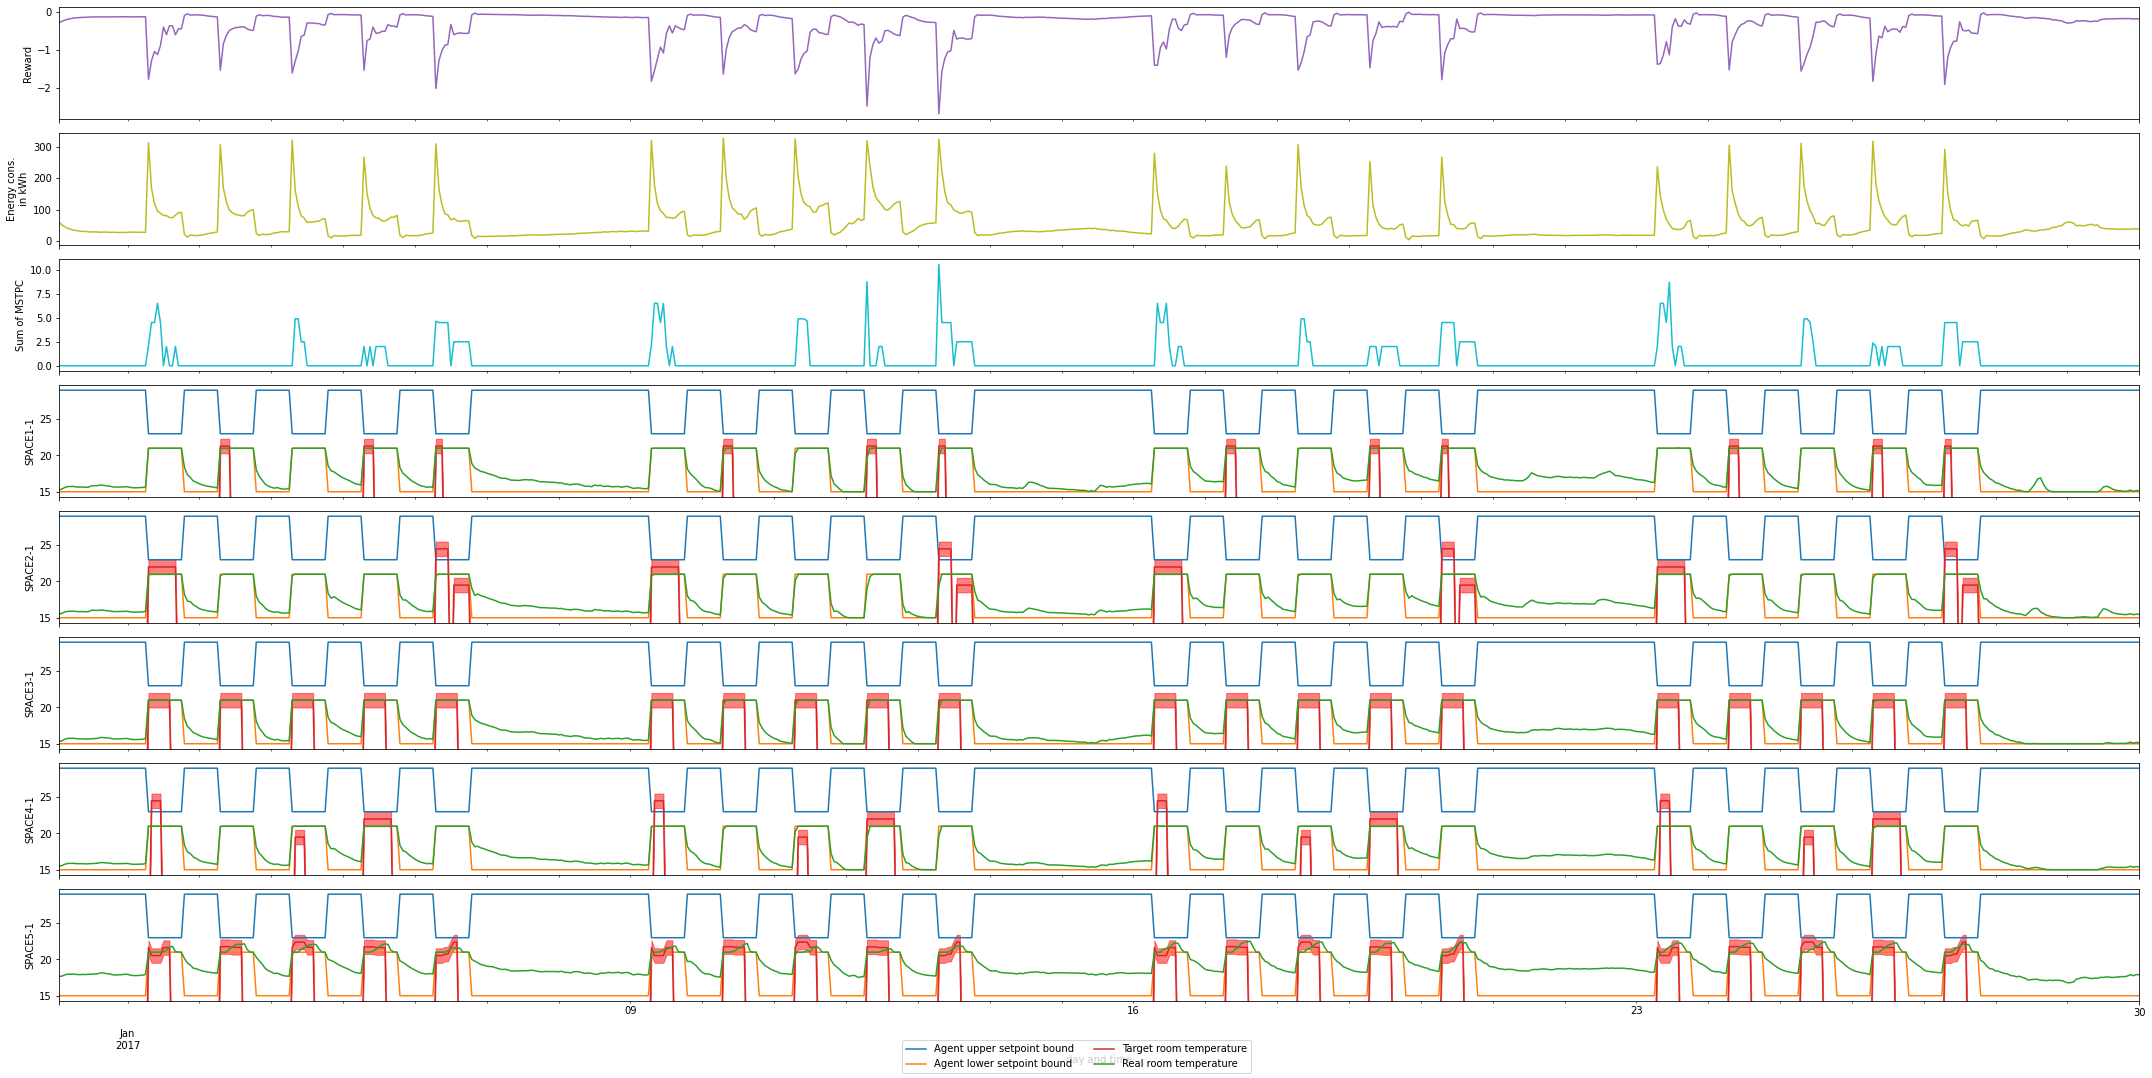

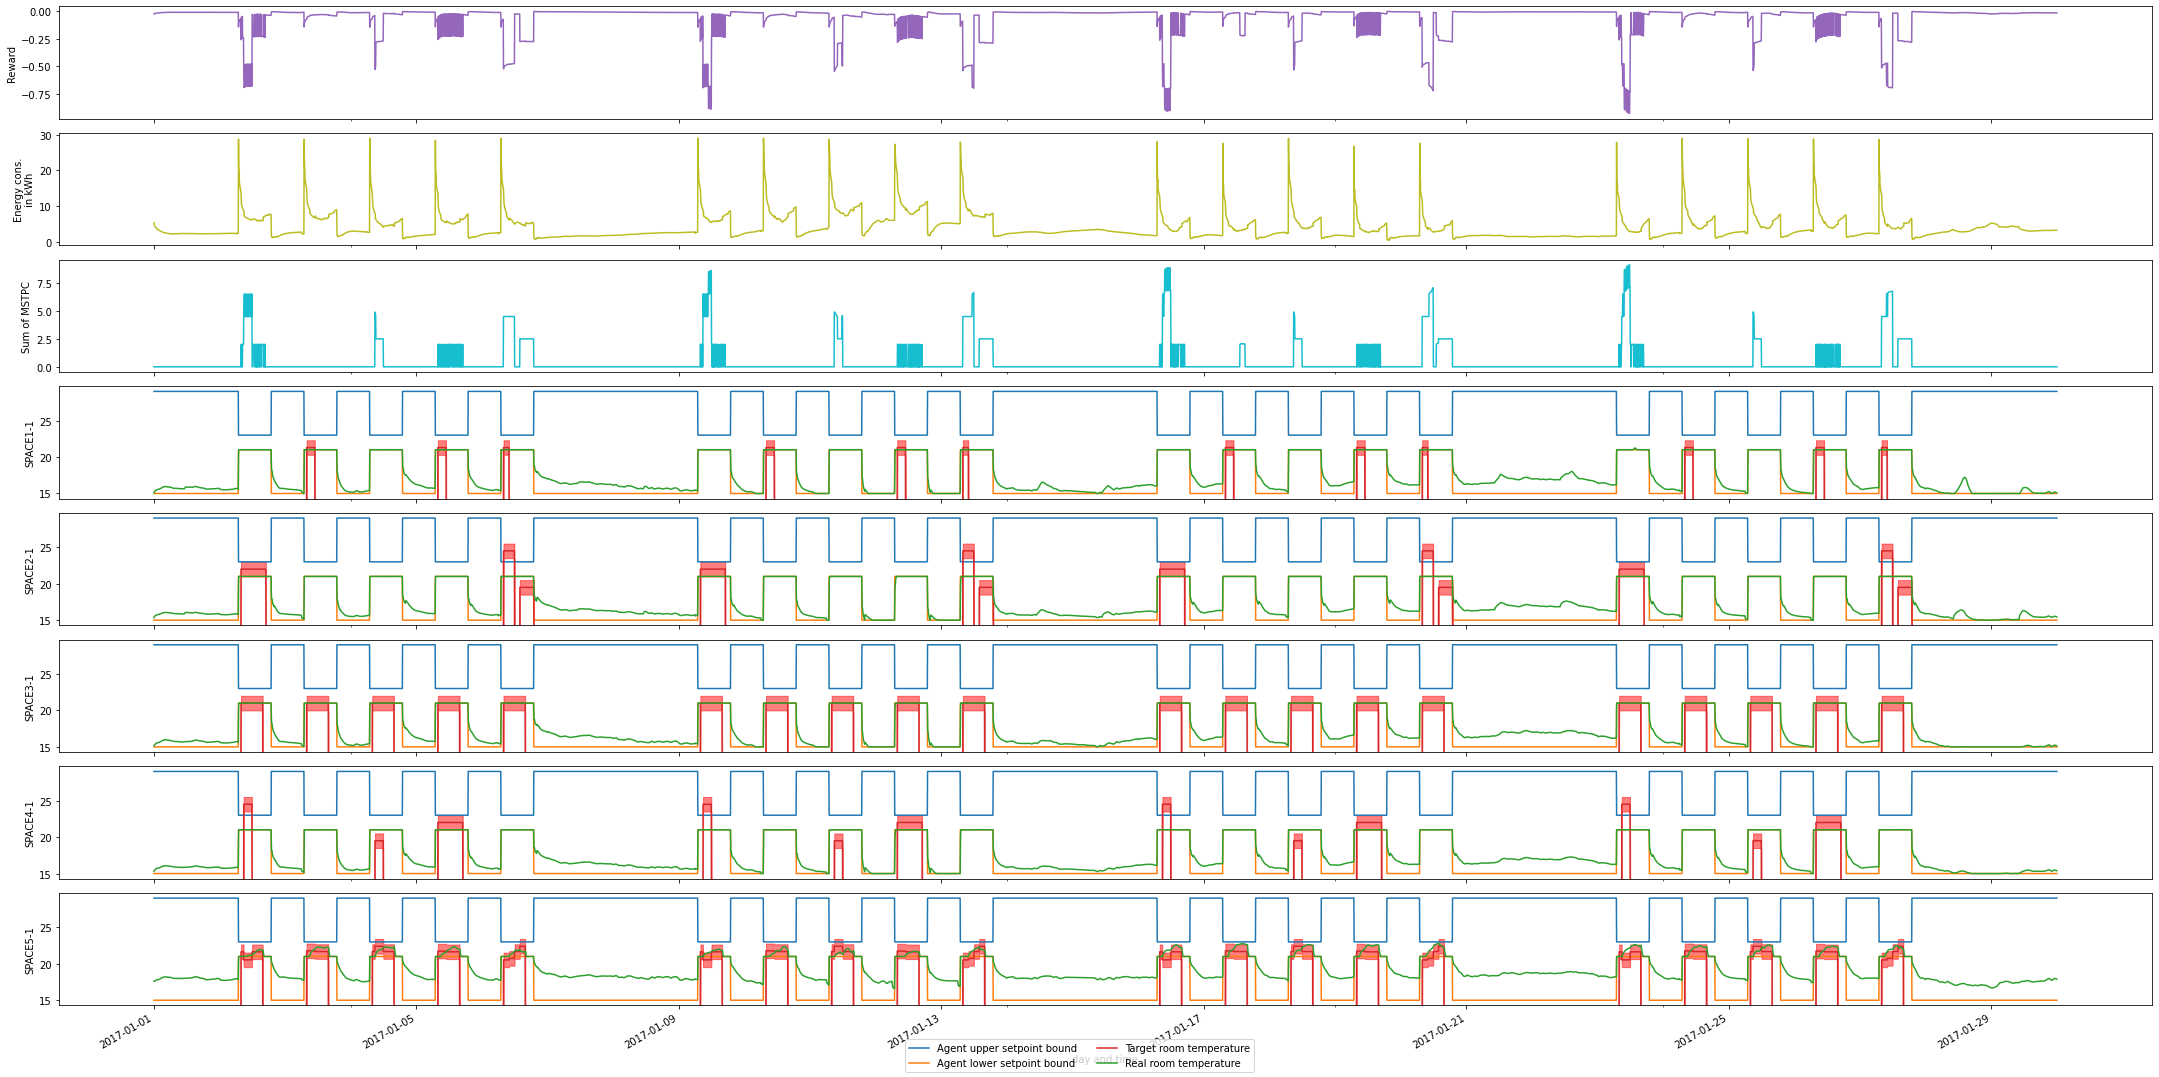

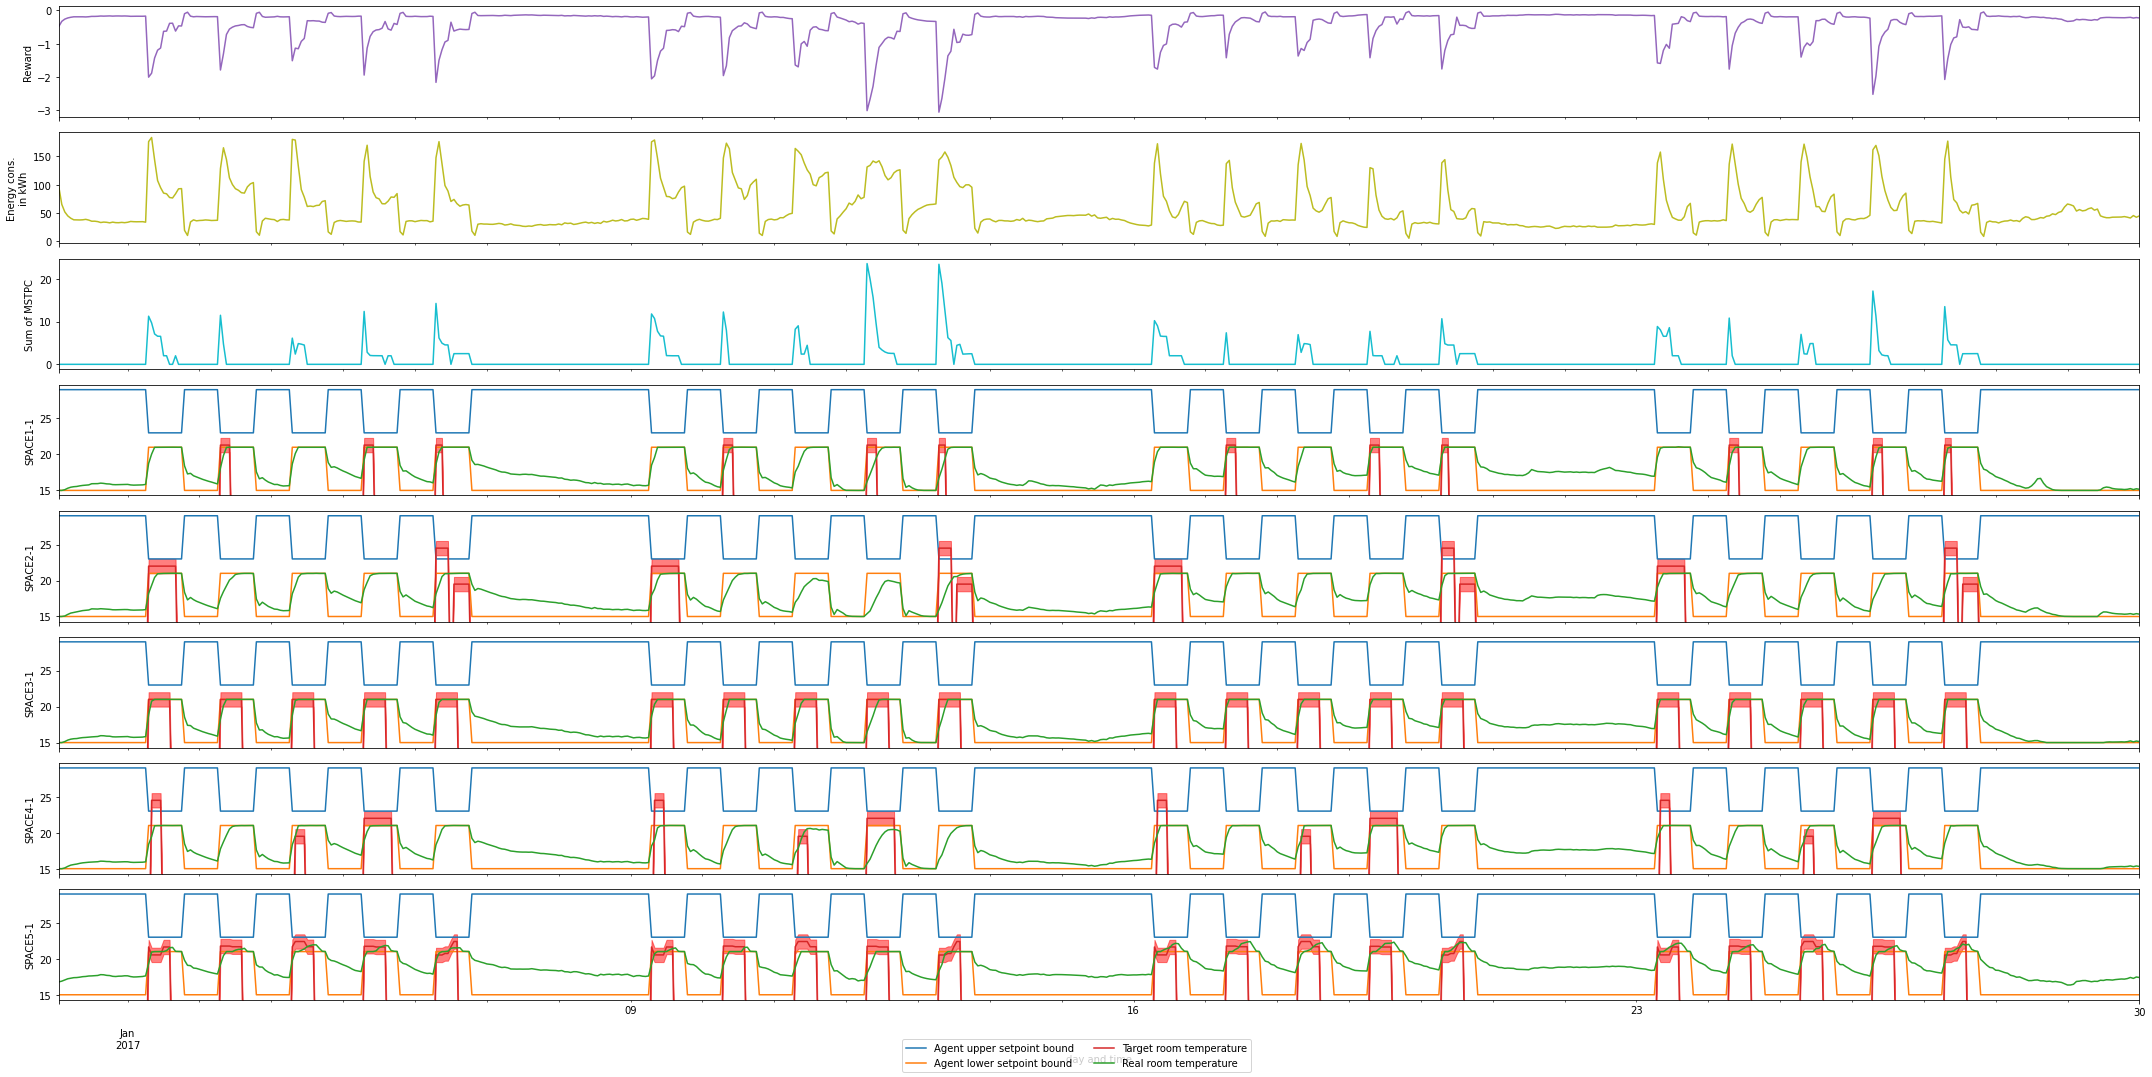

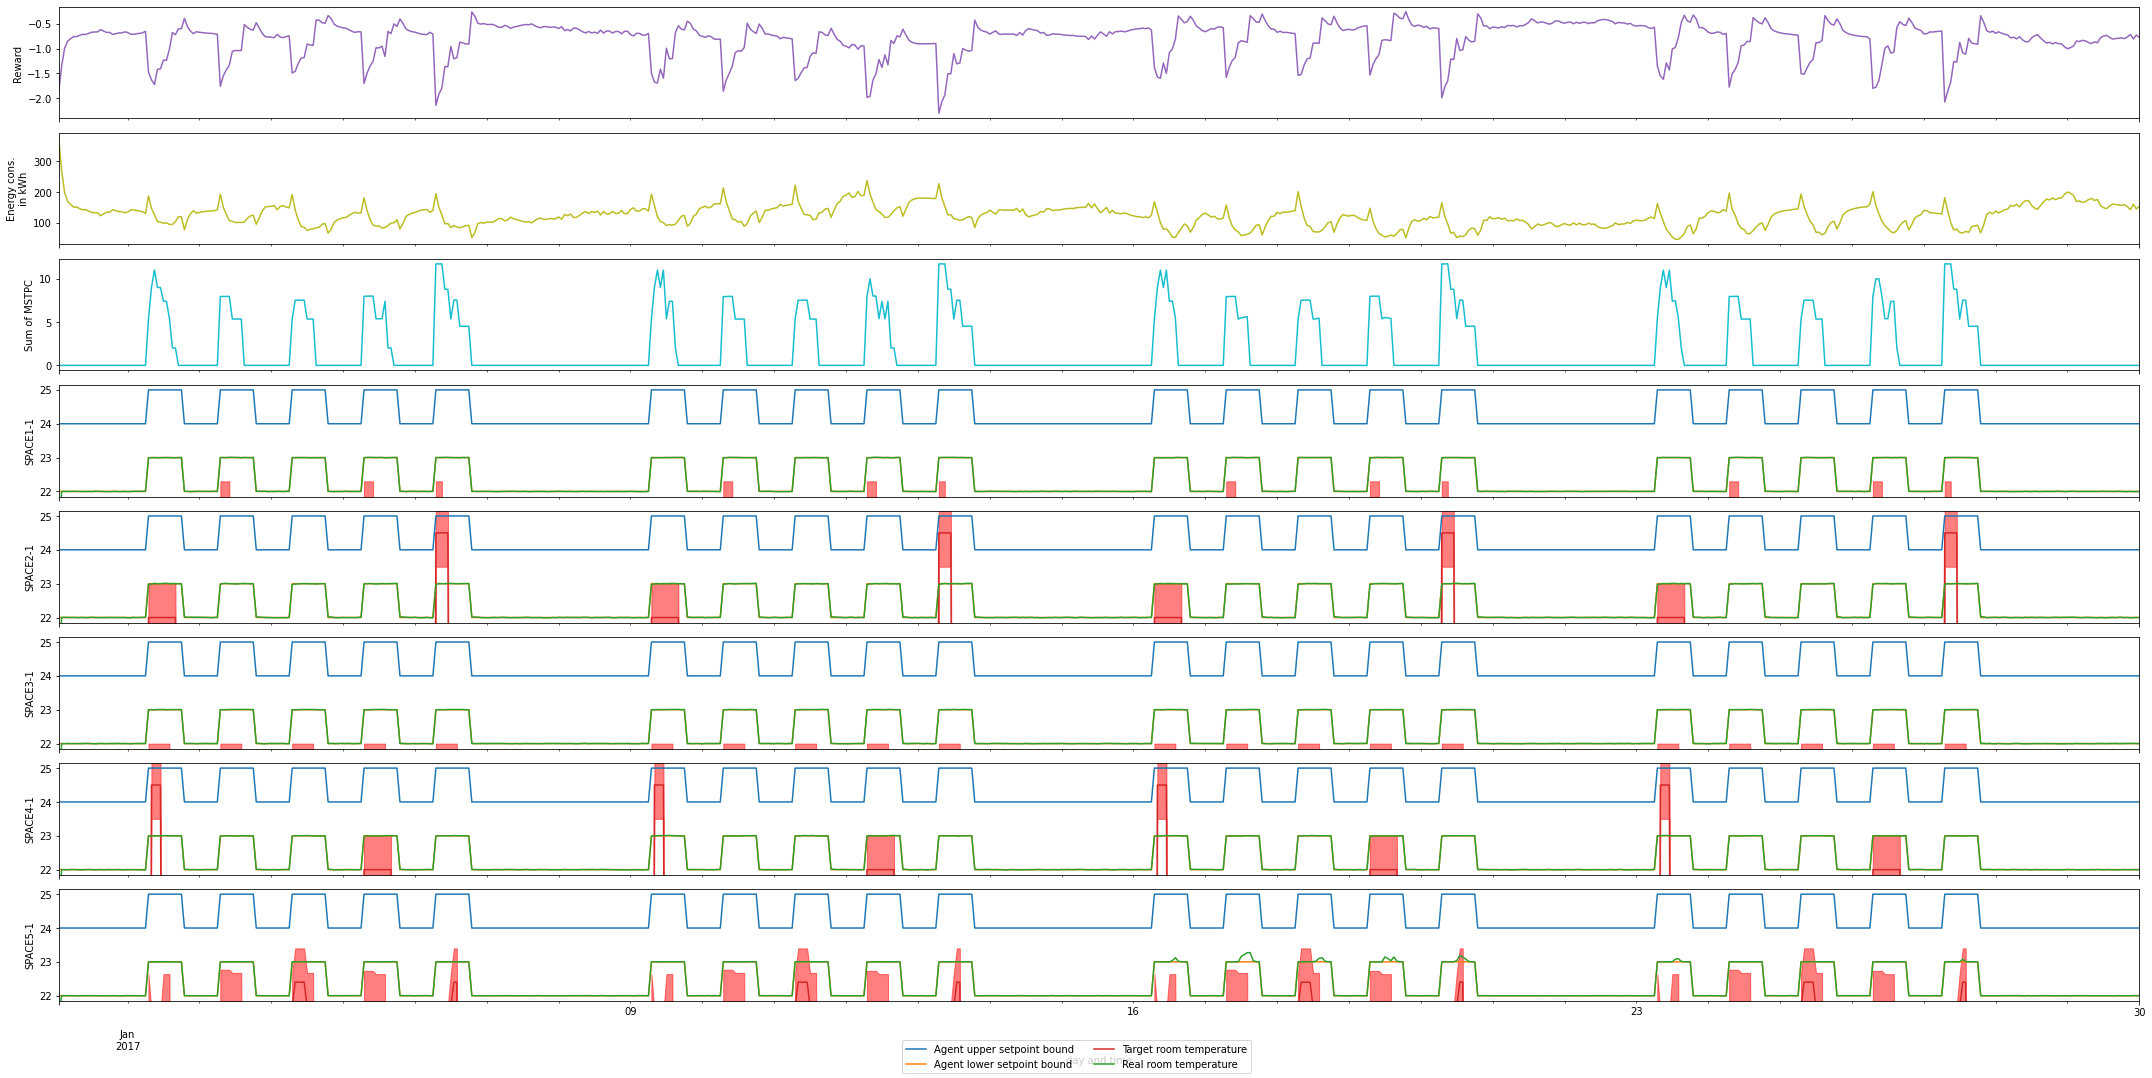

In [30]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

In [31]:
#vh.plot_q_values(q_values, fig_width)

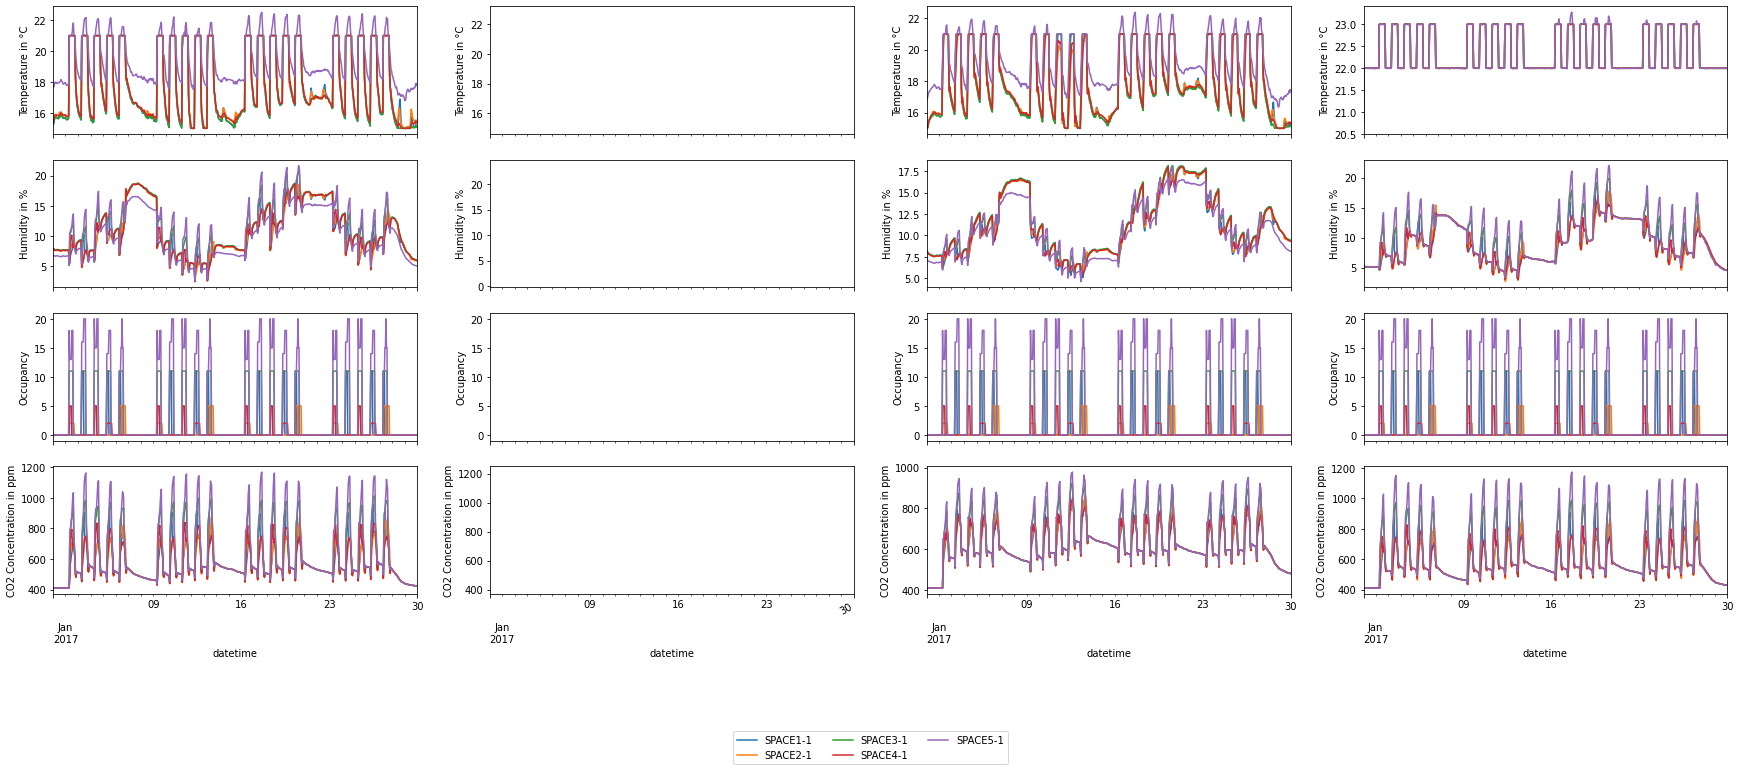

In [32]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()